In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import scanpy as sc
import numpy as np

# Download the data

In [2]:
!wget https://covid19.cog.sanger.ac.uk/submissions/release1/haniffa21.processed.h5ad -O Haniffa_all.h5ad

--2021-05-15 17:17:02--  https://covid19.cog.sanger.ac.uk/submissions/release1/haniffa21.processed.h5ad
Resolving covid19.cog.sanger.ac.uk (covid19.cog.sanger.ac.uk)... 193.62.203.63, 193.62.203.61, 193.62.203.62
Connecting to covid19.cog.sanger.ac.uk (covid19.cog.sanger.ac.uk)|193.62.203.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7187322881 (6.7G) [application/x-hdf]
Saving to: 'Haniffa_all.h5ad'

100%[====================================>] 7,187,322,881 3.42MB/s   in 36m 43s

2021-05-15 17:53:47 (3.11 MB/s) - 'Haniffa_all.h5ad' saved [7187322881/7187322881]



In [3]:
adata = sc.read('Haniffa_all.h5ad')
adata

AnnData object with n_obs × n_vars = 647366 × 24929
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id'
    var: 'feature_types'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    layers: 'raw'

In [4]:
cite = adata[:, adata.var['feature_types'] == 'Antibody Capture'].copy()
cite

AnnData object with n_obs × n_vars = 647366 × 192
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id'
    var: 'feature_types'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    layers: 'raw'

In [5]:
adata = adata[:, adata.var['feature_types'] == 'Gene Expression'].copy()
adata

AnnData object with n_obs × n_vars = 647366 × 24737
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id'
    var: 'feature_types'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    layers: 'raw'

# Preprocess healthy and covid separately

In [6]:
covid = adata[adata.obs.Status == 'Covid']
covid

View of AnnData object with n_obs × n_vars = 527286 × 24737
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id'
    var: 'feature_types'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    layers: 'raw'

In [7]:
healthy = adata[adata.obs.Status == 'Healthy']
healthy

View of AnnData object with n_obs × n_vars = 97039 × 24737
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id'
    var: 'feature_types'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    layers: 'raw'

In [8]:
covid_cite = cite[cite.obs.Status == 'Covid']
covid_cite

View of AnnData object with n_obs × n_vars = 527286 × 192
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id'
    var: 'feature_types'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    layers: 'raw'

In [9]:
healthy_cite = cite[cite.obs.Status == 'Healthy']
healthy_cite

View of AnnData object with n_obs × n_vars = 97039 × 192
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id'
    var: 'feature_types'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    layers: 'raw'

In [10]:
del cite
del adata

In [15]:
# copying fixes a scipy issues (https://github.com/theislab/anndata/issues/339)
healthy = healthy.copy()
healthy.X = healthy.layers['raw']
covid = covid.copy()
covid.X = covid.layers['raw']

In [20]:
covid_cite = covid_cite.copy()
healthy_cite = healthy_cite.copy()
covid_cite.X = covid_cite.layers['raw']
healthy_cite.X = healthy_cite.layers['raw']

In [21]:
covid.layers['count'] = covid.layers['raw']
healthy.layers['count'] = healthy.layers['raw']
covid_cite.layers['count'] = covid_cite.layers['raw']
healthy_cite.layers['count'] = healthy_cite.layers['raw']

del covid.layers['raw']
del healthy.layers['raw']
del covid_cite.layers['raw']
del healthy_cite.layers['raw']

# Normalize

In [22]:
sc.pp.normalize_total(covid, target_sum=1e4)
sc.pp.log1p(covid)

sc.pp.normalize_total(healthy, target_sum=1e4)
sc.pp.log1p(healthy)

In [23]:
def clr_normalize_each_cell(adata, inplace=True):
    """Normalize count vector for each cell, i.e. for each row of .X"""

    import numpy as np
    import scipy

    def seurat_clr(x):
        s = np.sum(np.log1p(x[x > 0]))
        exp = np.exp(s / len(x))
        return np.log1p(x / exp)

    if not inplace:
        adata = adata.copy()

    # apply to dense or sparse matrix, along axis. returns dense matrix
    adata.X = np.apply_along_axis(
        seurat_clr, 1, (adata.X.A if scipy.sparse.issparse(adata.X) else adata.X)
    )
    return adata

In [24]:
covid_cite = clr_normalize_each_cell(covid_cite)
healthy_cite = clr_normalize_each_cell(healthy_cite)

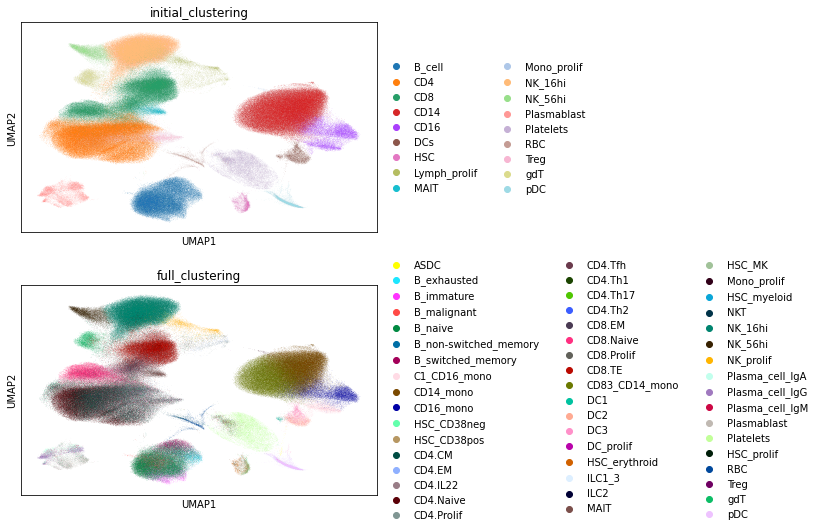

In [25]:
sc.pl.umap(covid, color = ['initial_clustering', 'full_clustering'], ncols=1)

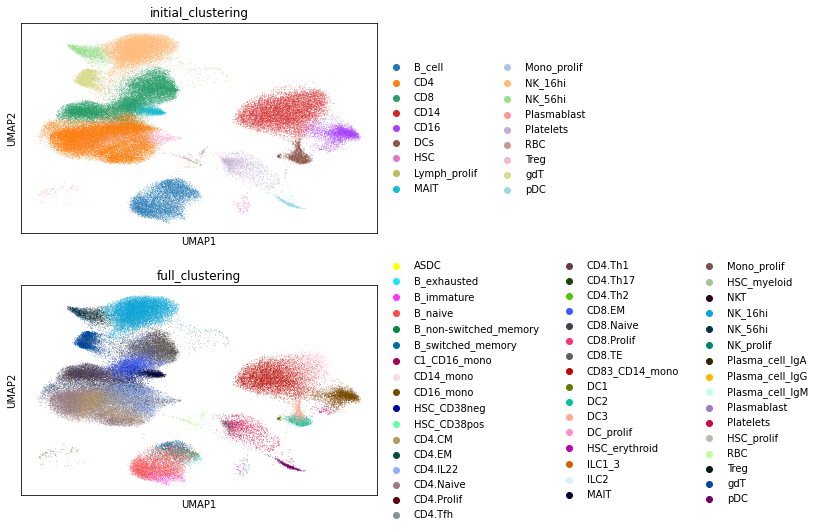

In [26]:
sc.pl.umap(healthy, color = ['initial_clustering', 'full_clustering'], ncols=1)

In [27]:
covid.write('../data/haniffa-2021/expressions_covid.h5ad')
healthy.write('../data/haniffa-2021/expressions_healthy.h5ad')
covid_cite.write('../data/haniffa-2021/protein_covid.h5ad')
healthy_cite.write('../data/haniffa-2021/protein_healthy.h5ad')